In [86]:
import sys 

sys.path.insert(1, 'SetUp/') 

import PackageInstall  

from PackageInstall import * 

### 1. Reading in the File and Performing Basic Analysis 

In [87]:
breastCancerData = pd.read_csv('data/bcw.csv')
print("\n This Following Table shows the Count,Mean,Std and ____ of the breastCancer Dataset\n")
breastCancerData.describe().T


 This Following Table shows the Count,Mean,Std and ____ of the breastCancer Dataset



,count,mean,std,min,25%,50%,75%,max
Sample_Number,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
Clump_Thickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Uniformity_of_Cell_Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Uniformity_of_Cell_Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal_Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single_Epithelial_Cell_Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Bland_Chromatin,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Normal_Nucleoli,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


In [88]:
#Table Clean Up - Remove Sample Number as not relevant 
breastCancerData.drop('Sample_Number', axis=1, inplace=True)
#Uncomment line below to see Table 
#breastCancerData

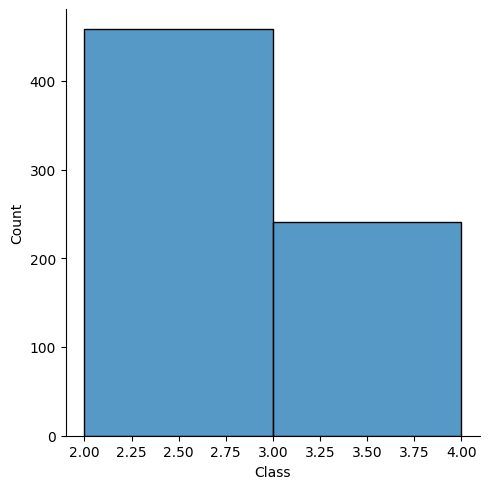

In [91]:
#Show the number of malignant vs benign tumours in the dataset
sns.displot(breastCancerData, x="Class", bins=2) 

In [6]:
malignant_data = breastCancerData.loc[breastCancerData["Class"]==2]  

benign_data = breastCancerData.loc[breastCancerData["Class"]==4] 

In [47]:
print("\n_______________________________________________________________________")
print("\n The Shape (rows/columns) of the malignant data set is:", malignant_data.shape)
print("\n The Shape (rows/columns) of the benign data set is:", benign_data.shape)
print("\n_______________________________________________________________________")



_______________________________________________________________________

 The Shape (rows/columns) of the malignant data set is: (458, 10)

 The Shape (rows/columns) of the benign data set is: (241, 10)

_______________________________________________________________________


In [53]:
malignant_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Clump_Thickness,458.0,2.956332,1.674318,1.0,1.0,3.0,4.0,8.0
Uniformity_of_Cell_Size,458.0,1.325328,0.907694,1.0,1.0,1.0,1.0,9.0
Uniformity_of_Cell_Shape,458.0,1.443231,0.997836,1.0,1.0,1.0,1.0,8.0
Marginal_Adhesion,458.0,1.364629,0.996830,1.0,1.0,1.0,1.0,10.0
Single_Epithelial_Cell_Size,458.0,2.120087,0.917130,1.0,2.0,2.0,2.0,10.0
Bland_Chromatin,458.0,2.100437,1.080339,1.0,1.0,2.0,3.0,7.0
Normal_Nucleoli,458.0,1.290393,1.058856,1.0,1.0,1.0,1.0,9.0
Mitoses,458.0,1.063319,0.501995,1.0,1.0,1.0,1.0,8.0
Class,458.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0


In [76]:
benign_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Clump_Thickness,241.0,7.195021,2.428849,1.0,5.0,8.0,10.0,10.0
Uniformity_of_Cell_Size,241.0,6.572614,2.719512,1.0,4.0,6.0,10.0,10.0
Uniformity_of_Cell_Shape,241.0,6.560166,2.562045,1.0,4.0,6.0,9.0,10.0
Marginal_Adhesion,241.0,5.547718,3.210465,1.0,3.0,5.0,8.0,10.0
Single_Epithelial_Cell_Size,241.0,5.298755,2.451606,1.0,3.0,5.0,6.0,10.0
Bland_Chromatin,241.0,5.979253,2.273852,1.0,4.0,7.0,7.0,10.0
Normal_Nucleoli,241.0,5.863071,3.350672,1.0,3.0,6.0,10.0,10.0
Mitoses,241.0,2.589212,2.557939,1.0,1.0,1.0,3.0,10.0
Class,241.0,4.000000,0.000000,4.0,4.0,4.0,4.0,4.0


In [100]:
breastCancerData['Class'].unique()

array([2, 4])

<AxesSubplot: >

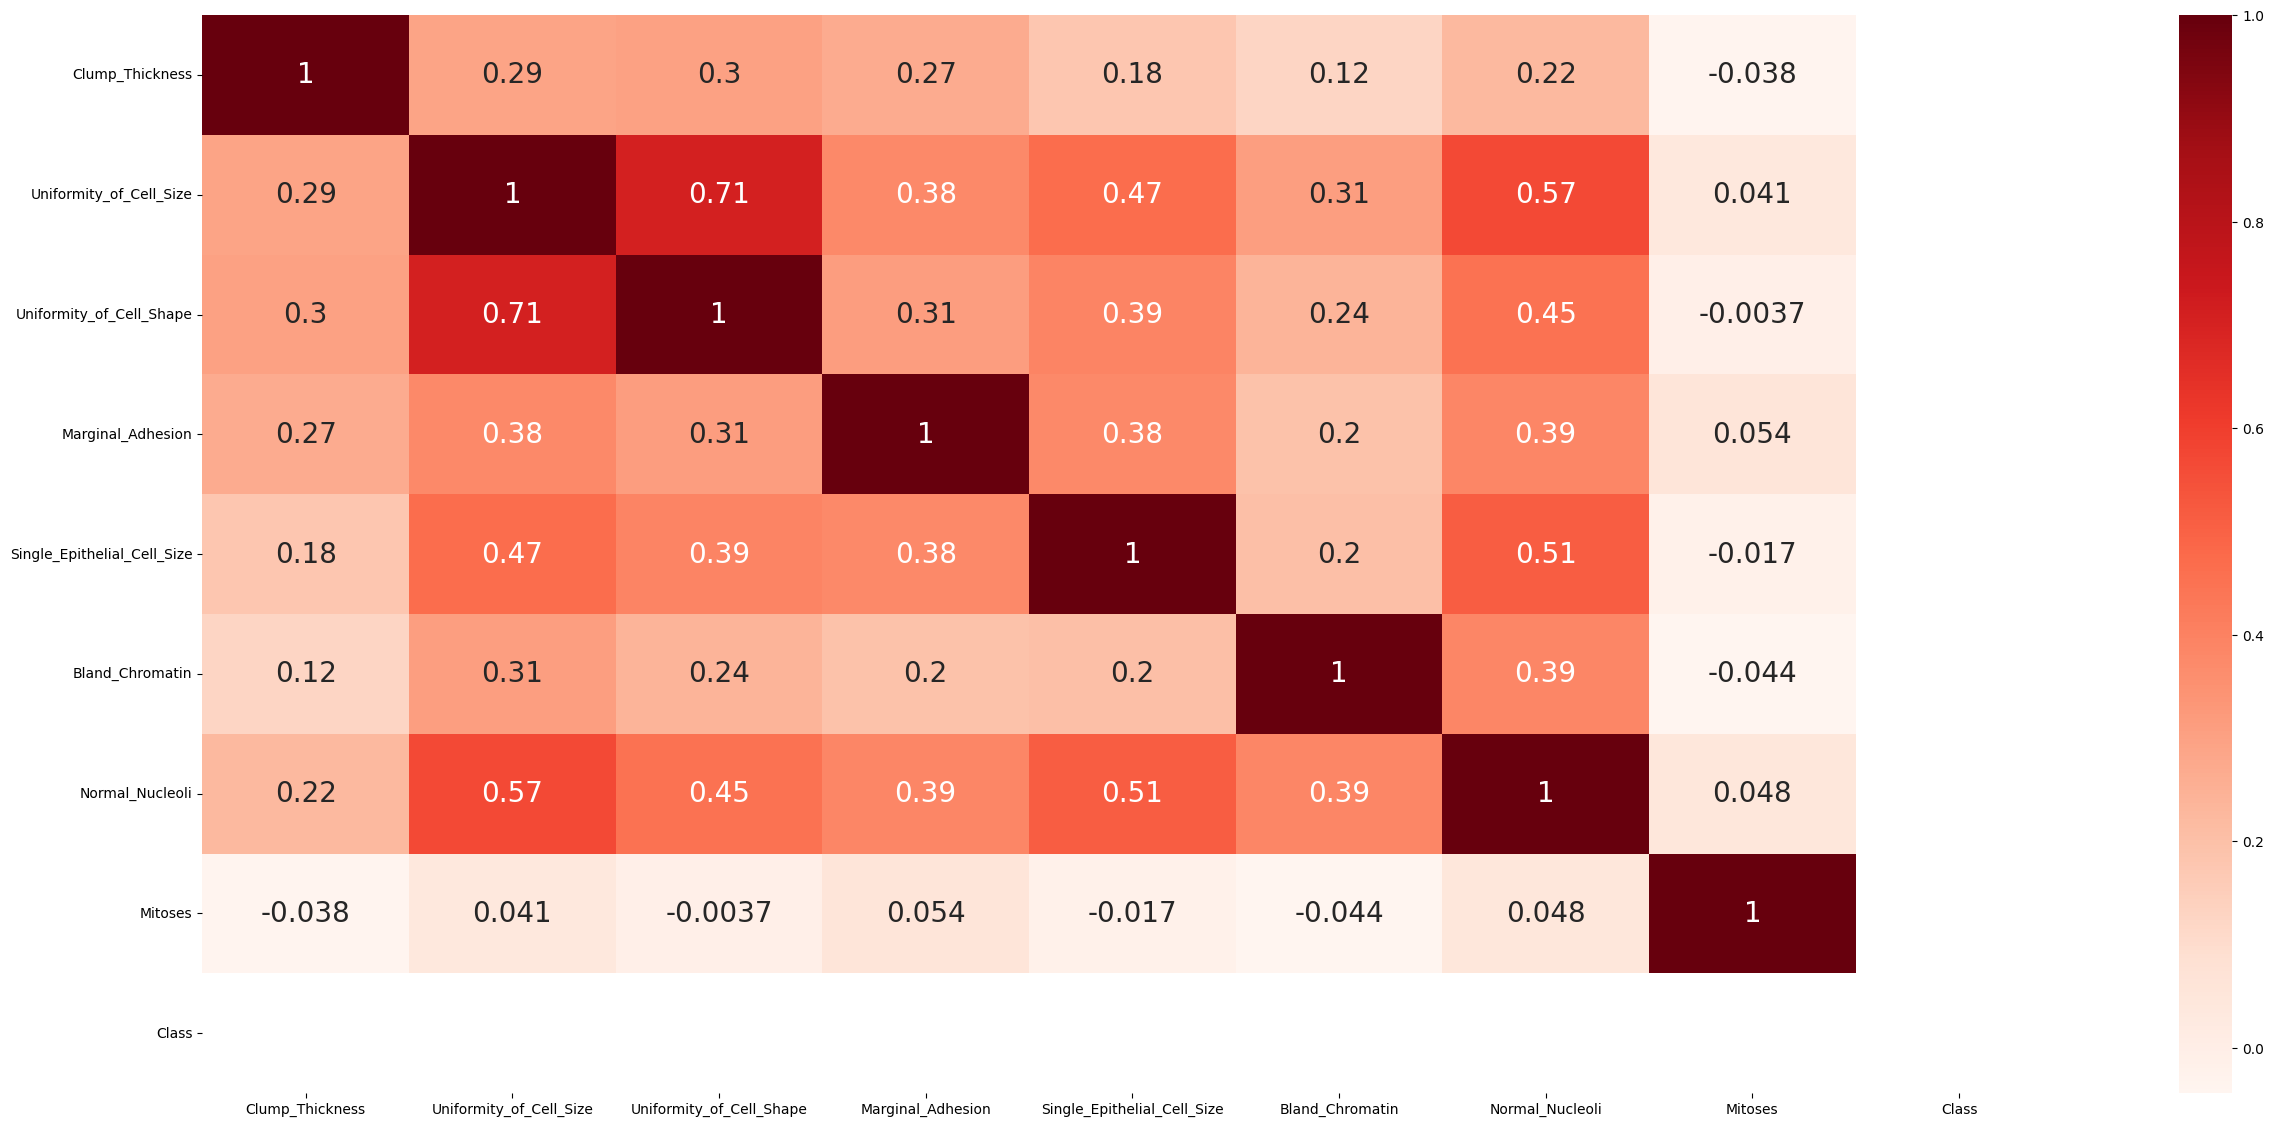

In [9]:
plt.figure(figsize=(30,14)) 

sns.heatmap(malignant_data.corr(),annot=True,cmap='Reds', annot_kws={'size': 20})


<AxesSubplot: >

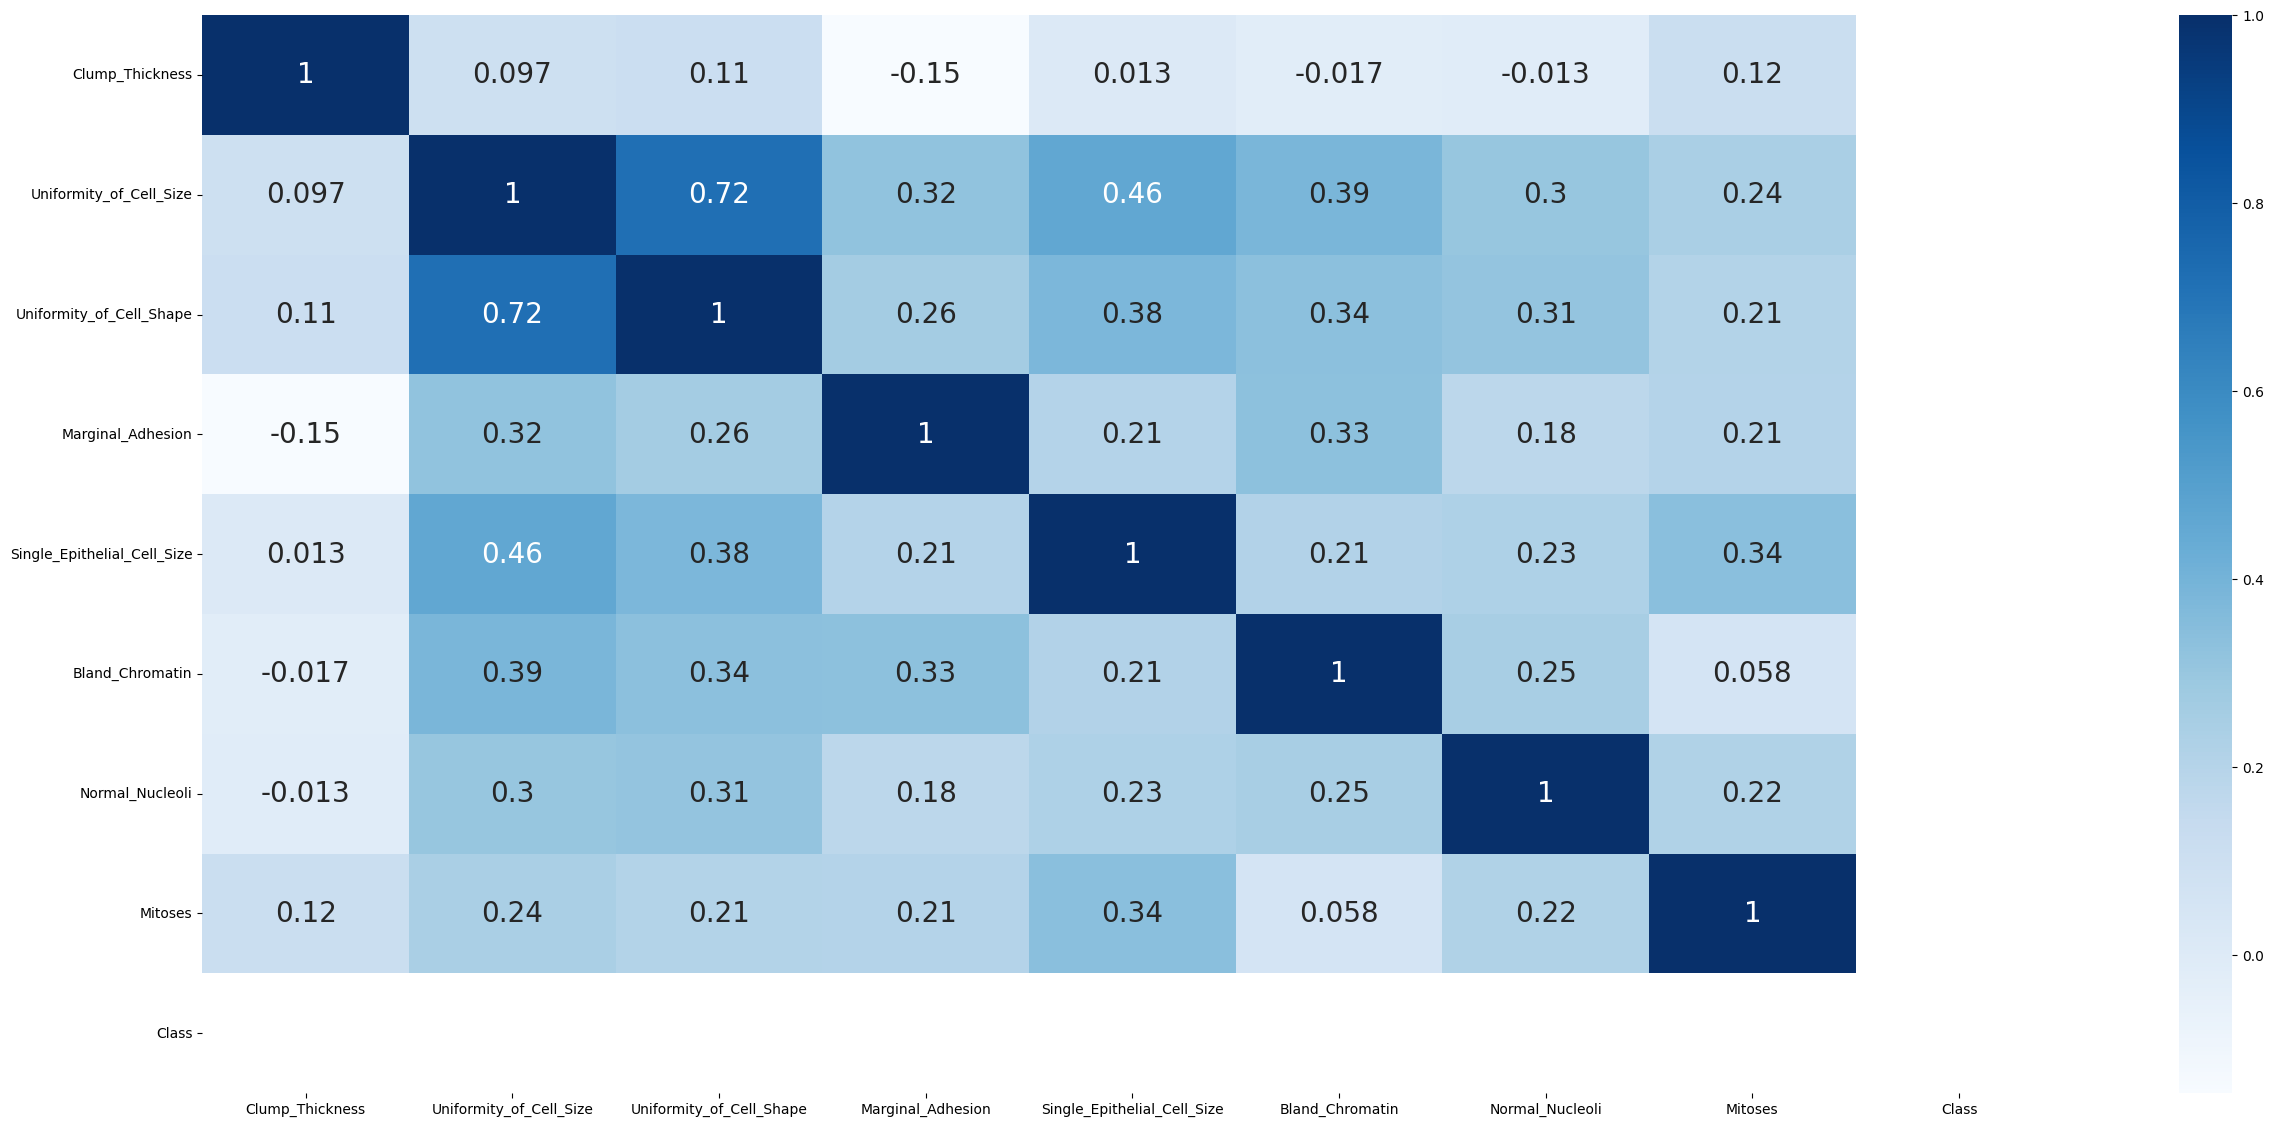

In [10]:
plt.figure(figsize=(30,14)) 

sns.heatmap(benign_data.corr(),annot=True,cmap='Blues', annot_kws={'size': 20})

Text(0.5, 1.0, 'Hist: Marginal_Adhesion of Benign Case')

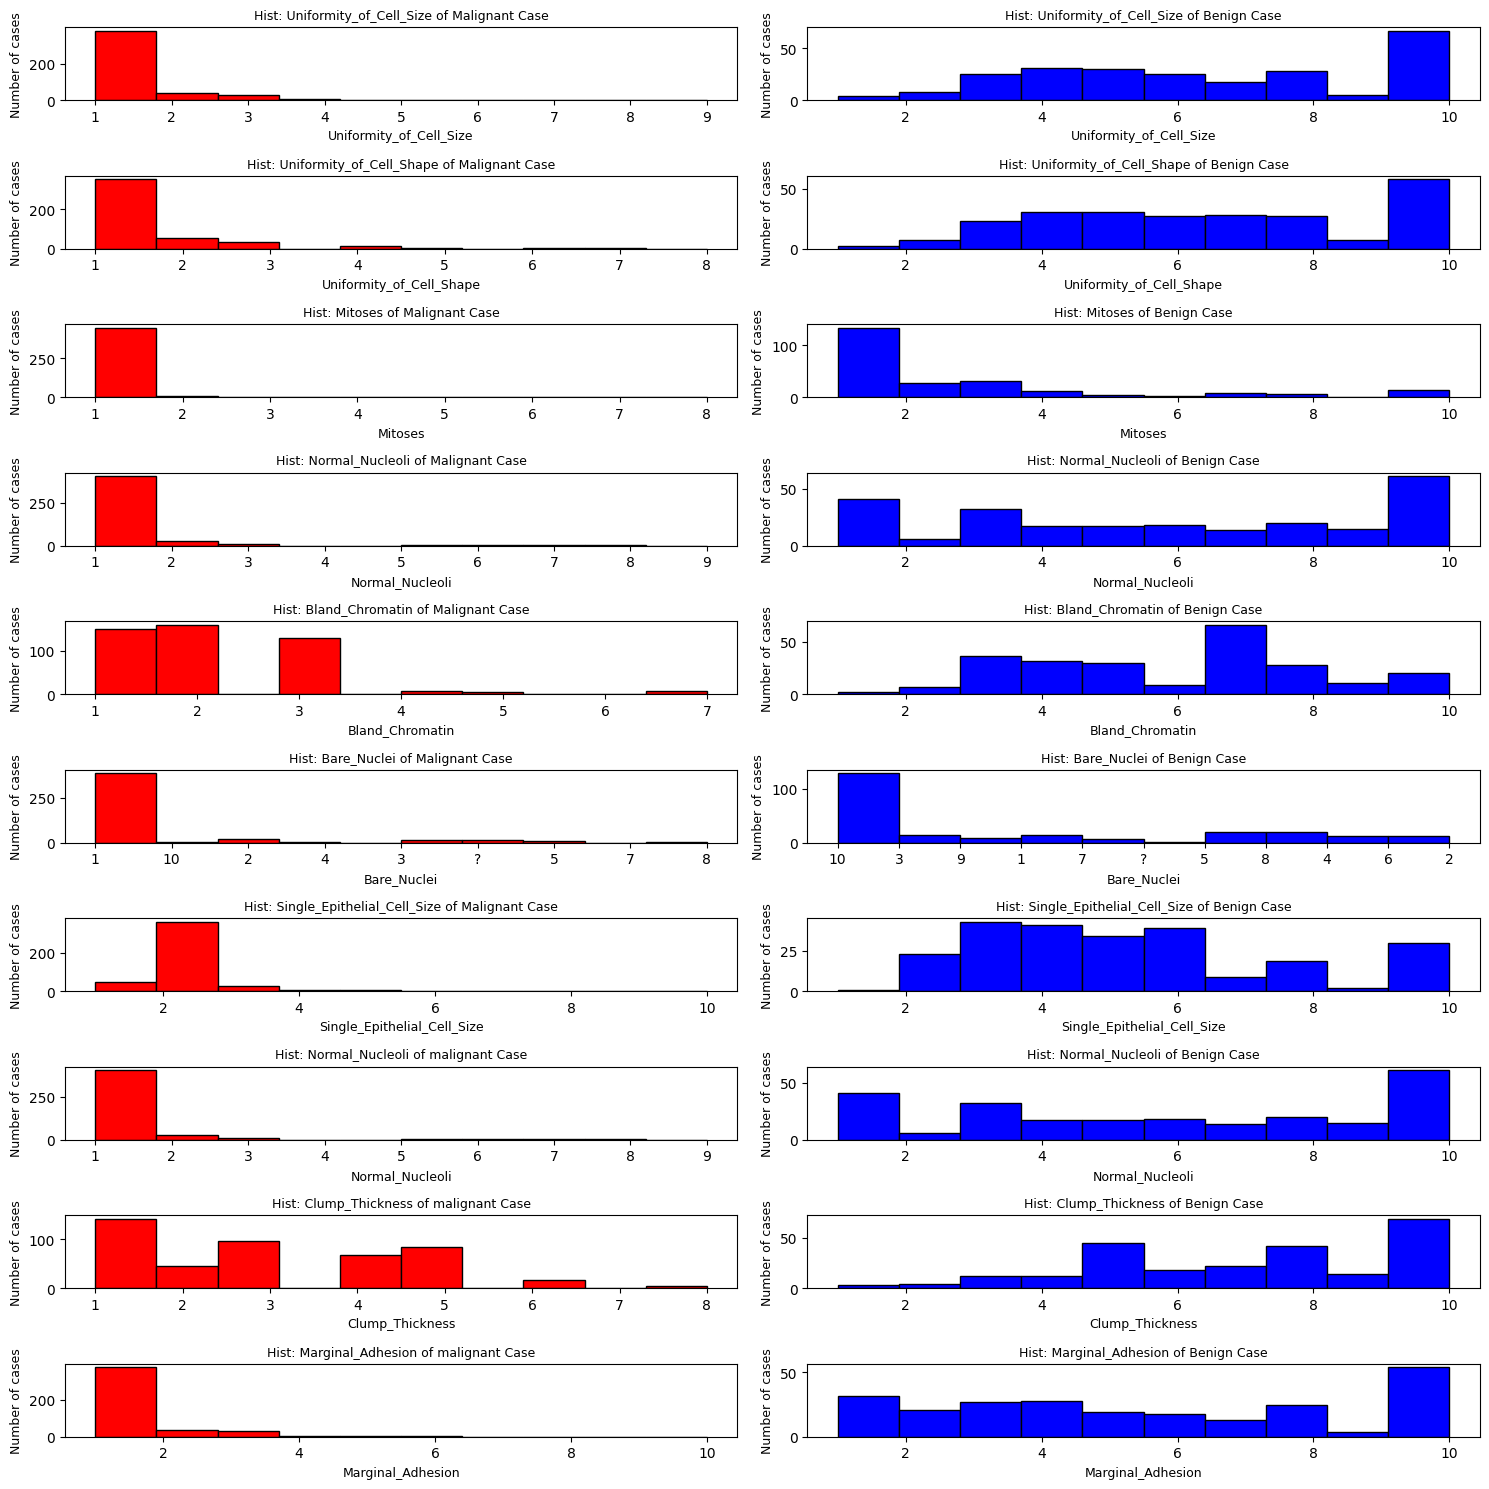

In [11]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15, 15), tight_layout=False) 

  

def distributionGraphs_malignant(measurement, position): 

    plt.subplot(10, 2, position) 

    plt.hist( malignant_data[measurement], color = 'red', edgecolor = 'black',bins = 10)

    plt.xlabel(measurement, size = 9) 

    plt.ylabel('Number of cases', size = 9) 

     

def distributionGraphs_benign(measurement, position): 

    plt.subplot(10, 2, position) 

    plt.hist( benign_data [measurement], color = 'blue', edgecolor = 'black',bins = 10) 

    plt.xlabel(measurement, size = 9) 

    plt.ylabel('Number of cases', size = 9) 

  

distributionGraphs_malignant('Uniformity_of_Cell_Size', 1) 

plt.title('Hist: Uniformity_of_Cell_Size of Malignant Case', size = 9) 

distributionGraphs_benign('Uniformity_of_Cell_Size', 2) 

plt.title('Hist: Uniformity_of_Cell_Size of Benign Case', size = 9) 

distributionGraphs_malignant('Uniformity_of_Cell_Shape', 3) 

plt.title('Hist: Uniformity_of_Cell_Shape of Malignant Case', size = 9) 

distributionGraphs_benign('Uniformity_of_Cell_Shape', 4) 

plt.title('Hist: Uniformity_of_Cell_Shape of Benign Case', size = 9) 

distributionGraphs_malignant('Mitoses', 5) 

plt.title('Hist: Mitoses of Malignant Case', size = 9) 

distributionGraphs_benign('Mitoses', 6) 

plt.title('Hist: Mitoses of Benign Case', size = 9) 

distributionGraphs_malignant('Normal_Nucleoli', 7) 

plt.title('Hist: Normal_Nucleoli of Malignant Case', size = 9) 

distributionGraphs_benign('Normal_Nucleoli', 8) 

plt.title('Hist: Normal_Nucleoli of Benign Case', size = 9) 

distributionGraphs_malignant('Bland_Chromatin', 9) 

plt.title('Hist: Bland_Chromatin of Malignant Case', size = 9) 

distributionGraphs_benign('Bland_Chromatin', 10) 

plt.title('Hist: Bland_Chromatin of Benign Case', size = 9) 

distributionGraphs_malignant('Bare_Nuclei', 11) 

plt.title('Hist: Bare_Nuclei of Malignant Case', size = 9) 

distributionGraphs_benign('Bare_Nuclei', 12) 

plt.title('Hist: Bare_Nuclei of Benign Case', size = 9) 


distributionGraphs_malignant('Single_Epithelial_Cell_Size', 13) 

plt.title('Hist: Single_Epithelial_Cell_Size of Malignant Case', size = 9) 

distributionGraphs_benign('Single_Epithelial_Cell_Size', 14) 

plt.title('Hist: Single_Epithelial_Cell_Size of Benign Case', size = 9) 


distributionGraphs_malignant('Normal_Nucleoli', 15) 

plt.title('Hist: Normal_Nucleoli of malignant Case', size = 9) 


distributionGraphs_benign('Normal_Nucleoli', 16) 

plt.title('Hist: Normal_Nucleoli of Benign Case', size = 9) 


distributionGraphs_malignant('Clump_Thickness', 17) 

plt.title('Hist: Clump_Thickness of malignant Case', size = 9) 

distributionGraphs_benign('Clump_Thickness', 18) 

plt.title('Hist: Clump_Thickness of Benign Case', size = 9) 


distributionGraphs_malignant('Marginal_Adhesion', 19) 

plt.title('Hist: Marginal_Adhesion of malignant Case', size = 9) 


distributionGraphs_benign('Marginal_Adhesion', 20) 

plt.title('Hist: Marginal_Adhesion of Benign Case', size = 9) 



## Build Model 

In [74]:
X=breastCancerData.drop(['Class'],axis=1)
y=breastCancerData['Class']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=40)


     Clump_Thickness  Uniformity_of_Cell_Size  Uniformity_of_Cell_Shape  \
594                4                        8                         6   
441                5                        2                         2   
533                3                        1                         1   
200                9                        7                         7   
193                1                        1                         1   
..               ...                      ...                       ...   
440               10                        4                         3   
165                4                        1                         1   
7                  2                        1                         2   
219                6                        1                         3   
326               10                        1                         1   

     Marginal_Adhesion  Single_Epithelial_Cell_Size Bare_Nuclei  \
594                  3          

In [62]:
from sklearn.preprocessing import StandardScaler as ss

X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

TypeError: TransformerMixin.fit_transform() missing 1 required positional argument: 'X'

In [70]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

model1=lr.fit(X_train, Y_train)
prediction1=model1.predict(X_test)

ValueError: could not convert string to float: '?'

In [96]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(Y_test,prediction1)
cm

NameError: name 'prediction1' is not defined

In [97]:
sns.heatmap(cm,annot=True)
plt.show()

NameError: name 'cm' is not defined

In [ ]:
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Test the accuracy')

In [ ]:
###New train 

train, test = train_test_split(breastCancerData, test_size=0.15, random_states=1)

# References 

1. Assessment 1 - Functionality of graphs 
2. Data source - https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)
3. Machine learning Statistical analysis of Breast Cancer https://www.mdpi.com/2227-9032/8/2/111
4. Models https://www.youtube.com/watch?v=c8s5GKRrenY
5. Models 